### Prepared By:

- Christina Montasser 20190382 S3
- Esraa Yazid 20190093 S1
- Mariam Ihab 20190801 S1
- Mirette Amin 20190570 S3
- Nader Atef 20190575 S3

`Group Number: 28`


In [ ]:
# %pip install opendatasets

In [1]:
# import opendatasets as od
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
# https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset
df = pd.read_csv("./smoke_detection_iot.csv")

In [8]:
class PCA:
    def __init__(self, n):
        self.num_comopnents = n
        self.__covMat = 0
        self.__eigenVec = 0
        self.__eigenVals = 0
        self.mean = 0

    def fit(self, data):
        # rowvar makes meanedData transposed
        self.mean = np.mean(data, axis=0)
        meanedData = data - self.mean
        self.__covMat = np.cov(meanedData, rowvar=False)
        self.__eigenVals, self.__eigenVec = np.linalg.eigh(self.__covMat)

        # Sort Eigen Vectors and Eigen Values
        idx_sorted = np.argsort(self.__eigenVals)[::-1]
        self.__eigenVals = self.__eigenVals[idx_sorted]
        self.__eigenVec = self.__eigenVec[:, idx_sorted]

    def getCovarianceMat(self):
        return self.__covMat

    def getEigenVectors(self):
        return self.getEigenVectors

    def getEigenVals(self):
        return self.getEigenVals

    def transform(self, data):
        subset = self.__eigenVec[:, 0 : self.num_comopnents]
        meanedData = data - self.mean
        reduced = np.dot(subset.transpose(), meanedData.transpose()).transpose()
        return reduced

    def fit_transform(self, data):
        self.fit(data)
        res = self.transform(data)
        return res

In [10]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [16]:
df = pd.read_csv("smoke_detection_iot.csv")
df.drop(["Unnamed: 0", "UTC", "CNT"], axis=1, inplace=True)
y = df.pop("Fire Alarm").to_numpy()
X = df
scaler = StandardScaler()
# Splitting Data
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.3, shuffle=True)
x_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [17]:
# using 2 components only for visualization we can do more
pca = PCA(2)
trainPCA = pca.fit_transform(x_scaled)
testPCA = pca.transform(x_test_scaled)

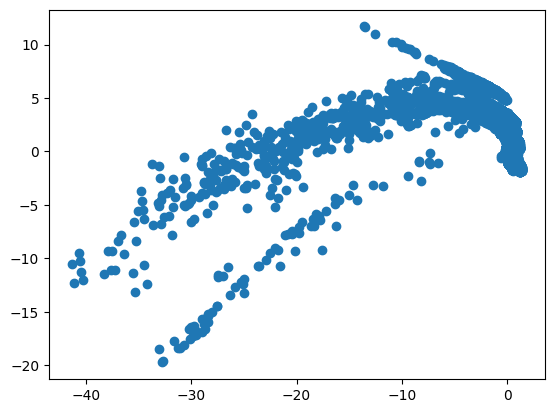

In [18]:
import matplotlib.pyplot as plt

plt.scatter(train[:, 0], train[:, 1])
plt.show()

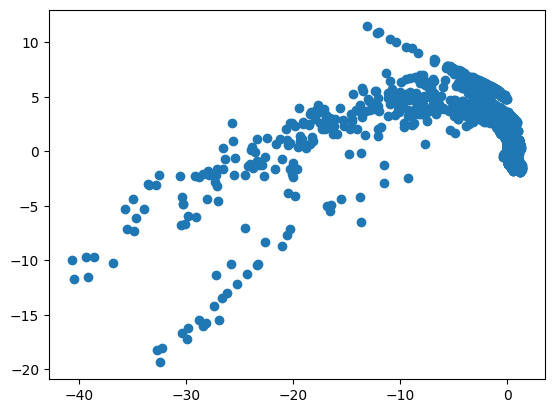

In [19]:
import matplotlib.pyplot as plt

plt.scatter(test[:, 0], test[:, 1])
plt.show()

In [ ]:
class Competitive_Net:
    def __init__(self, clusters: int):
        self.clusters_nb = clusters
        self.weights = None

    def fit(self, X_train: float, epochs: int, learning_rate: float):
        self.weights = np.random.rand(X_train.shape[0], self.clusters_nb)
        self.weights = preprocessing.normalize(self.weights, norm="l2")
        for epoch in epochs:
            z = np.dot(self.weights.T, X_train)
            winner_idx = np.argmax(z)
            self.weights[winner_idx] = self.weights[winner_idx] + learning_rate * (X_train - self.weights[winner_idx])
            print("Epoch: ", epoch)
        return self.weights

In [ ]:
net =  Competitive_Net(2)

In [ ]:
# Without PCA
net.fit(x_scaled)

In [ ]:
# With PCA
net.fit(trainPCA)